# Exploración del archivo Steam Games ya limpio.

Primero, se importan las librerías necesarias

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
from wordcloud import WordCloud

Se cargan los archivos necesarios. 
Con el archivo de juegos limpio, se hará el análisis de precios, desarrolladores, fecha de lanzamiento y nombres de juegos. 
Con el archivo de géneros, se analizarán los géneros de los juegos. 
Con el archivo de reseñas, se hará análisis de reseñas.

In [6]:
df_juegos = pd.read_parquet('etljuegoslimpio.parquet')
df_juegos.head()

,Unnamed: 0,app_name,title,id,price,early_access,developer,release_date,genre_1980s,genre_1990's,...,tag_Warhammer 40K.1,tag_Web Publishing.1,tag_Werewolves.1,tag_Western.1,tag_Word Game.1,tag_World War I.1,tag_World War II.1,tag_Wrestling.1,tag_Zombies.1,tag_e-sports.1
0,88310,Lost Summoner Kitty,Lost Summoner Kitty,761140.0,4.99,761140.0,Kotoshiro,2018-01-04,0,0,...,0,0,0,0,0,0,0,0,0,0
1,88311,Ironbound,Ironbound,643980.0,0.00,643980.0,Secret Level SRL,2018-01-04,0,0,...,0,0,0,0,0,0,0,0,0,0
2,88312,Real Pool 3D - Poolians,Real Pool 3D - Poolians,670290.0,0.00,670290.0,Poolians.com,2017-07-24,0,0,...,0,0,0,0,0,0,0,0,0,0
3,88313,弹炸人2222,弹炸人2222,767400.0,0.99,767400.0,彼岸领域,2017-12-07,0,0,...,0,0,0,0,0,0,0,0,0,0
4,88315,Battle Royale Trainer,Battle Royale Trainer,772540.0,3.99,772540.0,Trickjump Games Ltd,2018-01-04,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_juegos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28899 entries, 0 to 28898
Columns: 1143 entries, Unnamed: 0 to tag_e-sports.1
dtypes: float64(127), int64(1012), object(4)
memory usage: 252.0+ MB


In [8]:
df_generos=pd.read_parquet('generos.parquet')
df_generos.head()

,genres,app_name,title,id,tags,specs,price,early_access,developer,release_date
0,Strategy,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,761140,Kotoshiro,2018-01-04
1,Action,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,761140,Kotoshiro,2018-01-04
2,Indie,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,761140,Kotoshiro,2018-01-04
3,Casual,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,761140,Kotoshiro,2018-01-04
4,Simulation,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,761140,Kotoshiro,2018-01-04


In [9]:
df_generos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155382 entries, 0 to 155381
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   genres        155268 non-null  object        
 1   app_name      155382 non-null  object        
 2   title         155382 non-null  object        
 3   id            155382 non-null  int64         
 4   tags          155268 non-null  object        
 5   specs         154554 non-null  object        
 6   price         155382 non-null  float64       
 7   early_access  155382 non-null  int64         
 8   developer     155382 non-null  object        
 9   release_date  155382 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 11.9+ MB


In [11]:
df_reseñas=pd.read_parquet('reseñas.parquet')
df_reseñas.head()

,user_id,review,item_id,0,1,Año,año_modaitem
0,76561197970982479,Simple yet with great replayability. In my opi...,1250,False,True,2011.0,2014.0
1,76561197970982479,It's unique and worth a playthrough.,22200,False,True,2011.0,2011.0
2,76561197970982479,Great atmosphere. The gunplay can be a bit chu...,43110,False,True,2011.0,2014.0
3,js41637,I know what you think when you see this title ...,251610,False,True,2014.0,2014.0
4,js41637,For a simple (it's actually not all that simpl...,227300,False,True,2013.0,2014.0


In [12]:
df_reseñas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58431 entries, 0 to 58430
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       58431 non-null  object 
 1   review        58393 non-null  object 
 2   item_id       58431 non-null  int64  
 3   0             58431 non-null  bool   
 4   1             58431 non-null  bool   
 5   Año           58431 non-null  float64
 6   año_modaitem  54825 non-null  float64
dtypes: bool(2), float64(2), int64(1), object(2)
memory usage: 2.3+ MB


### Análisis de precios.

In [25]:
df_juegos['price'].value_counts()

price
4.99      5107
9.99      3590
2.99      3186
0.99      2479
1.99      2268
          ... 
27.49        1
139.92       1
6.00         1
16.06        1
160.91       1
Name: count, Length: 137, dtype: int64

Se identifican los outliers

<Axes: ylabel='price'>

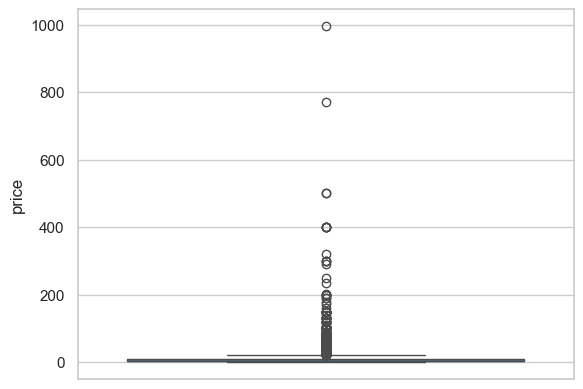

In [26]:
sns.boxplot(df_juegos['price'])

(0.0, 3000.0)

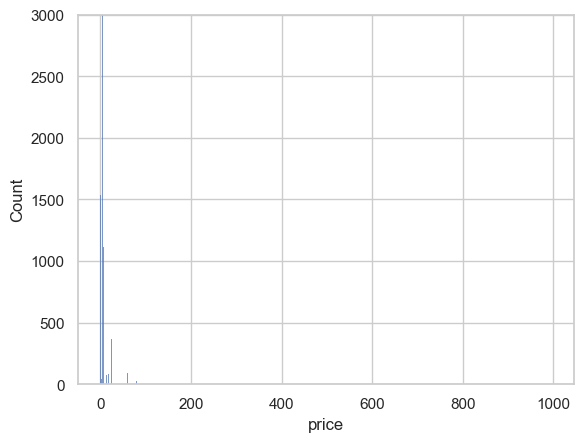

In [28]:
sns.histplot(df_juegos['price'], palette='viridis')
plt.ylim(0,3000)

Se hace una descripción estadística del dataframe.

In [29]:
df_juegos['price'].describe()

count    28899.000000
mean         8.837150
std         15.709419
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

In [30]:
max_price = df_juegos['price'].max()                 
median_price = np.mean(df_juegos['price'])           
q1 = np.quantile(df_juegos['price'], q=0.25)         
q3 = np.quantile(df_juegos['price'], q=0.75)         
iqr = q3 - q1                                       
lim_sup = q3 + 1.5*iqr                              

Se identifica el precio máximo y outliers de los juegos que están en el dataframe.

In [32]:
juego_max = df_juegos.loc[df_juegos['price'].idxmax(), 'app_name']
print(f'El precio máximo es {max_price} y corresponde al juego {juego_max}')

El precio máximo es 995.0 y corresponde al juego Strata Spaces VR – Professional Edition Upgrade


In [33]:
print('Los juegos con precio outlier son:\n')
juegos_outliers = df_juegos[df_juegos['price'] > lim_sup]['app_name'].tolist()
juegos_outliers

Los juegos con precio outlier son:



['SNOW - All Access Legend Pass',
 'SNOW - Lifetime Pack',
 'RACE - The WTCC Game',
 'Guild Wars Trilogy',
 'Train Simulator: Colton & Northern Route Add-On',
 'SEGA Mega Drive and Genesis Classics',
 'Mafia II',
 "Sid Meier's Civilization® V",
 'Call of Duty®: Black Ops',
 'Warhammer 40,000: Dawn of War II: Retribution',
 'Frozen Synapse',
 'Warhammer 40,000: Space Marine',
 'Call of Duty®: Modern Warfare® 3',
 'Crusader Kings II',
 'Total War: Shogun 2 - Fall of the Samurai',
 'Resident Evil: Operation Raccoon City',
 'Dungeons & Dragons Online® Menace of the Underdark™',
 'Spiral Knights: Guardians Armor Pack',
 'Sleeping Dogs',
 'Gotham City Impostors Free to Play: Ultimate Impostor Kit',
 'Carrier Command: Gaea Mission',
 '3D-Coat V4.8',
 'Rocksmith™',
 'APB Reloaded Urban Survival Pack',
 'Call of Duty®: Black Ops II',
 'Painkiller Hell & Damnation: Satan Claus DLC',
 'DmC: Devil May Cry',
 '3DMark',
 'Omerta - City of Gangsters - The Bulgarian Colossus DLC',
 'RPG Maker VX Ace -

Se grafica la distribución de los datos exceptuando los outliers.

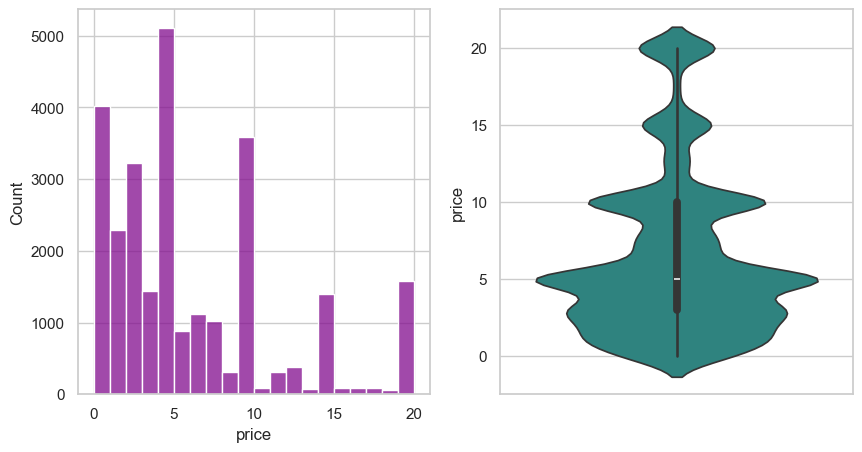

In [39]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize= (10,5))

ax1 = sns.histplot(df_juegos[df_juegos['price'] < lim_sup]['price'], bins=20, ax= ax1, color='#820c8e')
ax2 = sns.violinplot(df_juegos[df_juegos['price'] < lim_sup]['price'], ax= ax2, palette='viridis')

### Análisis de developers

In [40]:
df_juegos['developer'].value_counts()

developer
Ubisoft - San Francisco                     1259
SmiteWorks USA, LLC                          813
Dovetail Games                               253
KOEI TECMO GAMES CO., LTD.                   232
Paradox Development Studio                   156
                                            ... 
Salus Games                                    1
Class of  2016-2017                            1
Pirotexnik                                     1
ElVery333,Raquel Covelo Suarez,ATopeCode       1
Bidoniera Games                                1
Name: count, Length: 11011, dtype: int64

Se identifican los 10 desarrolladores con más juegos dentro del dataframe.

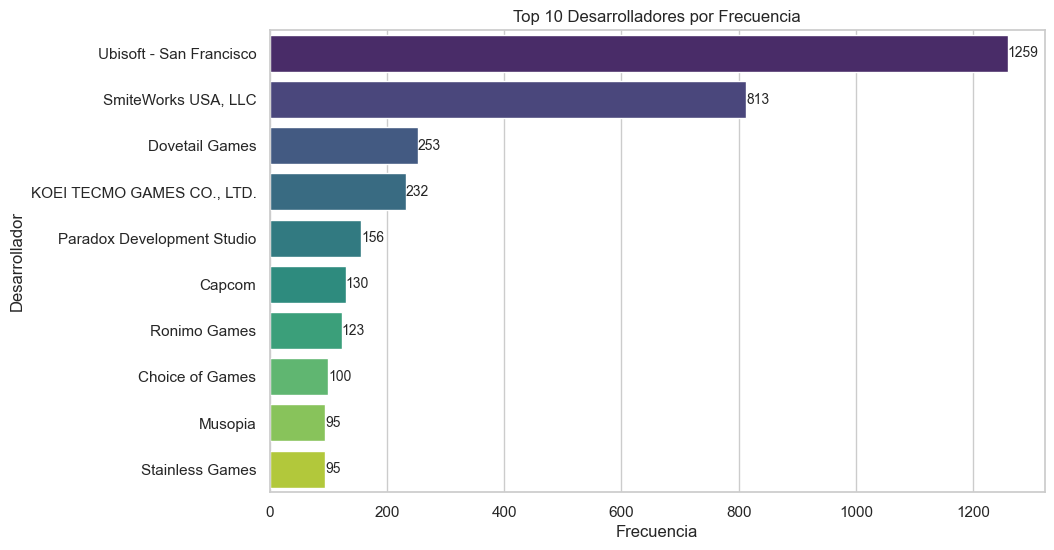

In [41]:
dev_data = df_juegos['developer'].value_counts().reset_index()
dev_data.rename(columns= {'count': 'Frecuencia'}, inplace=True)

plt.figure(figsize=(10,6))

histograma = sns.barplot(data=dev_data.head(10), y='developer', x='Frecuencia', palette="viridis")

for index, value in enumerate(dev_data.head(10)['Frecuencia']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.title('Top 10 Desarrolladores por Frecuencia')
plt.xlabel('Frecuencia')
plt.ylabel('Desarrollador')

plt.show()

Se identifican los desarrolladores con los juegos más costosos.

In [45]:
desarrolladores_outliers = df_juegos[df_juegos['price'] > lim_sup]['developer'].value_counts().reset_index()
desarrolladores_outliers.rename(columns= {'count': 'Frecuencia'}, inplace=True)
print(desarrolladores_outliers)

                                 developer  Frecuencia
0                      SmiteWorks USA, LLC          78
1               KOEI TECMO GAMES CO., LTD.          33
2                      MAGIX Software GmbH          27
3                           Dovetail Games          25
4                                 Carenado          24
..                                     ...         ...
837                   Sonic Team,Hardlight           1
838                                 Appeal           1
839                               TT Games           1
840                            Torus Games           1
841  DreamInCode B.V.,Squadron Interactive           1

[842 rows x 2 columns]


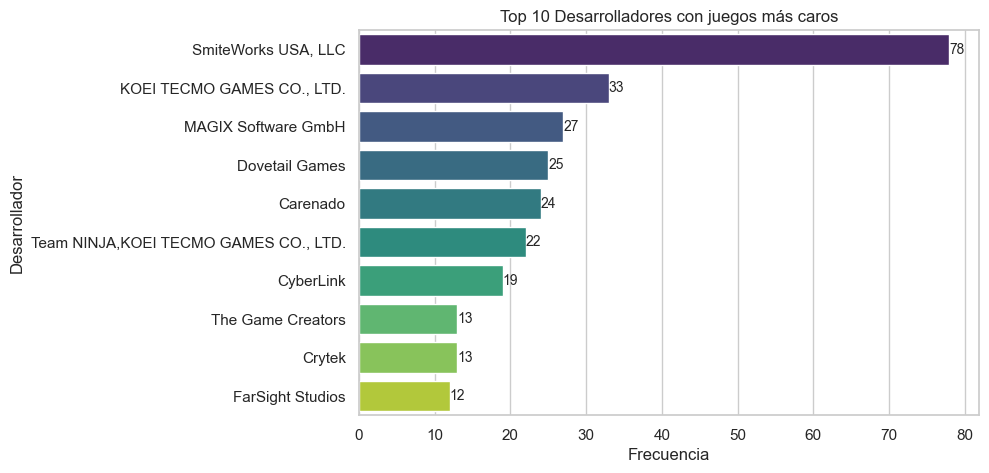

In [46]:
plt.figure(figsize=(8,5))

histograma = sns.barplot(data=desarrolladores_outliers.head(10), y='developer', x='Frecuencia', palette="viridis")

for index, value in enumerate(desarrolladores_outliers.head(10)['Frecuencia']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.title('Top 10 Desarrolladores con juegos más caros')
plt.xlabel('Frecuencia')
plt.ylabel('Desarrollador')

plt.show()

Se identifican los desarrolladores con los juegos más económicos

In [47]:
desarrolladores_baratos = df_juegos[df_juegos['price'] < median_price]['developer'].value_counts().reset_index()
desarrolladores_baratos.rename(columns= {'count': 'Frecuencia'}, inplace=True)
print(desarrolladores_baratos)

                       developer  Frecuencia
0        Ubisoft - San Francisco        1121
1            SmiteWorks USA, LLC         556
2     KOEI TECMO GAMES CO., LTD.         151
3                   Ronimo Games         119
4                         Capcom         105
...                          ...         ...
8117                      RDavis           1
8118           Vladimir Alekseev           1
8119              Enrick Lambert           1
8120                 Frostbullet           1
8121             Bidoniera Games           1

[8122 rows x 2 columns]


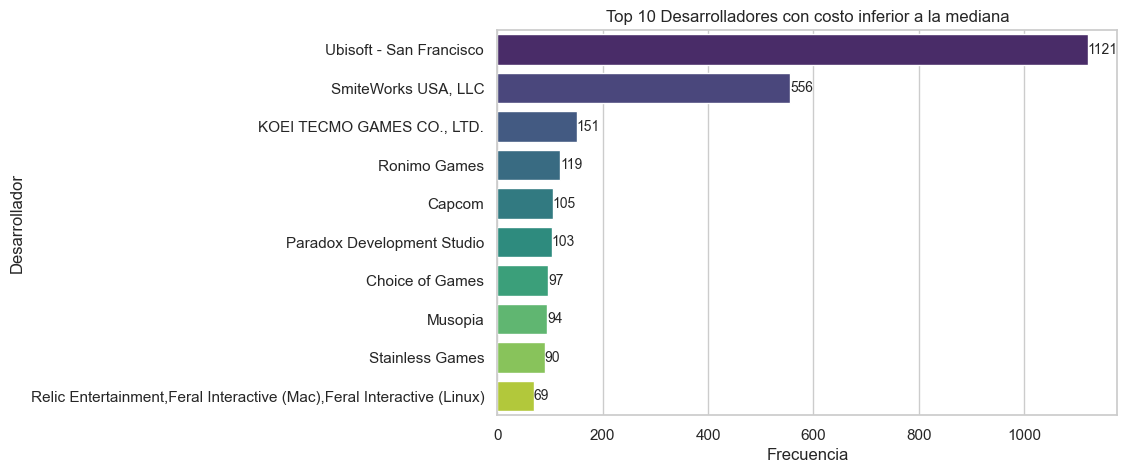

In [48]:
plt.figure(figsize=(8,5))

histograma = sns.barplot(data=desarrolladores_baratos.head(10), y='developer', x='Frecuencia', palette="viridis")

for index, value in enumerate(desarrolladores_baratos.head(10)['Frecuencia']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

plt.title('Top 10 Desarrolladores con costo inferior a la mediana')
plt.xlabel('Frecuencia')
plt.ylabel('Desarrollador')

plt.show()

### Análisis de fecha de lanzamiento.

In [52]:
df_juegos.head()

,Unnamed: 0,app_name,title,id,price,early_access,developer,release_date,genre_1980s,genre_1990's,...,tag_Warhammer 40K.1,tag_Web Publishing.1,tag_Werewolves.1,tag_Western.1,tag_Word Game.1,tag_World War I.1,tag_World War II.1,tag_Wrestling.1,tag_Zombies.1,tag_e-sports.1
0,88310,Lost Summoner Kitty,Lost Summoner Kitty,761140.0,4.99,761140.0,Kotoshiro,2018-01-04,0,0,...,0,0,0,0,0,0,0,0,0,0
1,88311,Ironbound,Ironbound,643980.0,0.00,643980.0,Secret Level SRL,2018-01-04,0,0,...,0,0,0,0,0,0,0,0,0,0
2,88312,Real Pool 3D - Poolians,Real Pool 3D - Poolians,670290.0,0.00,670290.0,Poolians.com,2017-07-24,0,0,...,0,0,0,0,0,0,0,0,0,0
3,88313,弹炸人2222,弹炸人2222,767400.0,0.99,767400.0,彼岸领域,2017-12-07,0,0,...,0,0,0,0,0,0,0,0,0,0
4,88315,Battle Royale Trainer,Battle Royale Trainer,772540.0,3.99,772540.0,Trickjump Games Ltd,2018-01-04,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
print(df_juegos['release_date'].dtype)

object


In [54]:
df_juegos['release_date'] = pd.to_datetime(df_juegos['release_date'])

In [55]:
df_juegos['release_date'].dt.year.value_counts().reset_index()

,release_date,count
0,2017,9243
1,2016,6721
2,2015,4788
3,2014,2751
4,2013,1460
5,2012,1351
6,2011,554
7,2010,409
8,2009,324
9,2008,196


Se grafica el desarrollo de videojuegos a lo largo del tiempo empleando un gráfico de barras.

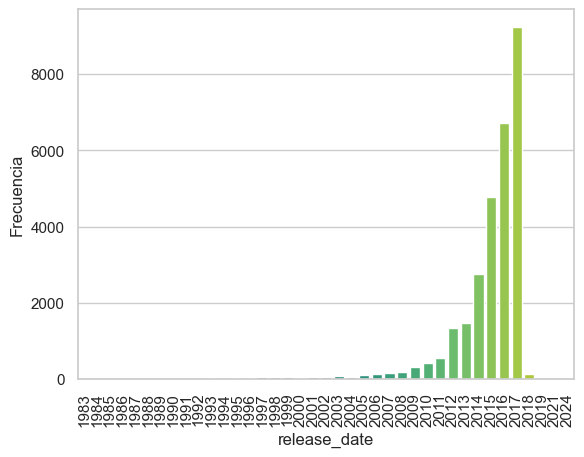

In [56]:
sns.barplot(data= df_juegos['release_date'].dt.year.value_counts().reset_index().rename(columns={'count': 'Frecuencia'}), 
            x='release_date', y='Frecuencia', palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [57]:
df_juegos['release_date'].dt.year

0        2018
1        2018
2        2017
3        2017
4        2018
         ... 
28894    2018
28895    2018
28896    2018
28897    2018
28898    2017
Name: release_date, Length: 28899, dtype: int32

<Axes: ylabel='release_date'>

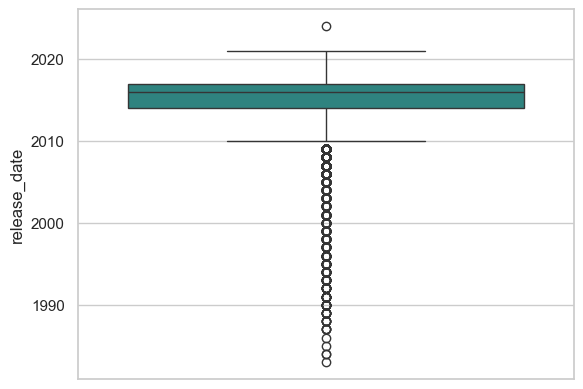

In [58]:
sns.boxplot(df_juegos['release_date'].dt.year, palette='viridis')

Genero la columna 'Año' en el dataframe.

In [60]:
df_juegos['Año'] = df_juegos['release_date'].dt.year
print(df_juegos['Año'])

0        2018
1        2018
2        2017
3        2017
4        2018
         ... 
28894    2018
28895    2018
28896    2018
28897    2018
28898    2017
Name: Año, Length: 28899, dtype: int32


Grafico la distribución de videojuegos lanzados por año empleando un Scatterplot.

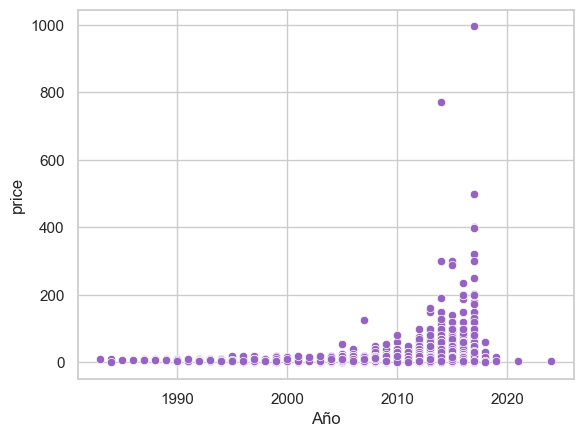

In [64]:
sns.set(style="whitegrid")
sns.scatterplot(data= df_juegos, x= 'Año', y= 'price', color='#9663c4');

### Análisis de los géneros de los videojuegos.

Para esto, empleo el dataframe 'df_generos'. Creo una columna año para tener un rango de fechas con el que filtrar la información.

In [13]:
df_generos['Año'] = df_generos['release_date'].dt.year

In [14]:
df_generos.head(5)

,genres,app_name,title,id,tags,specs,price,early_access,developer,release_date,Año
0,Strategy,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,761140,Kotoshiro,2018-01-04,2018
1,Action,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,761140,Kotoshiro,2018-01-04,2018
2,Indie,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,761140,Kotoshiro,2018-01-04,2018
3,Casual,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,761140,Kotoshiro,2018-01-04,2018
4,Simulation,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,761140,Kotoshiro,2018-01-04,2018


Observo la frecuencia de aparición de cada género.

In [15]:
# veamos la frecuencia de aparición de cada género
df_generos_frec = df_generos['genres'].value_counts().reset_index().rename(columns={'count': 'Frecuencia'})
df_generos_frec.head(10)

,genres,Frecuencia
0,Indie,16320
1,Action,11854
2,Adventure,9209
3,Casual,8864
4,Strategy,7338
5,Simulation,7041
6,RPG,5784
7,Singleplayer,4204
8,Multiplayer,2281
9,Free to Play,2205


Se grafica en un histograma el top 10 de géneros de videojuegos.

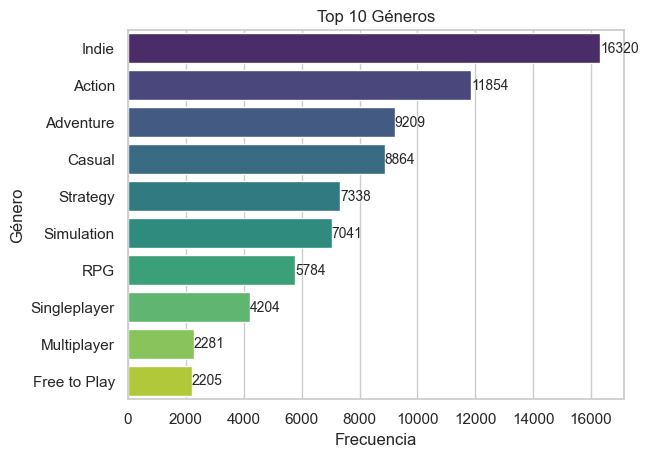

In [17]:
sns.barplot(data= df_generos_frec.head(10), x= 'Frecuencia', y= 'genres',palette='viridis')
for index, value in enumerate(df_generos_frec.head(10)['Frecuencia']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)
plt.title('Top 10 Géneros')
plt.xlabel('Frecuencia')
plt.ylabel('Género')

plt.show()

Se observa el comportamiento de géneros de acuerdo a su promedio de precios.

In [18]:
df_generos_precio=df_generos.groupby('genres').agg({'price':'mean'}).reset_index().sort_values(by='price', ascending=False)
df_generos_precio.head(10)

,genres,price
20,Animation & Modeling,50.749754
318,Video Production,48.591000
11,Accounting,42.490000
310,Tutorial,38.740000
28,Audio Production,37.072577
117,Game Development,36.117227
180,Movie,35.530000
334,Wrestling,32.115000
263,Software Training,30.276429
80,Design & Illustration,27.958235


Se analizan los géneros por precio, comenzando por los más costosos y continuando por los más económicos.

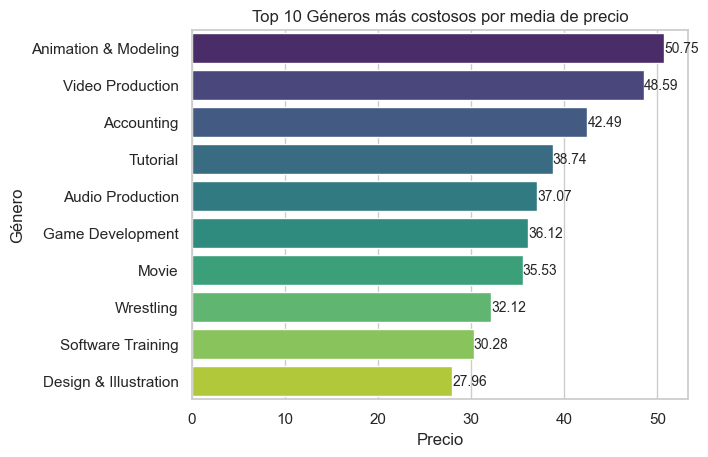

In [23]:
sns.barplot(data= df_generos_precio.head(10), x= 'price', y= 'genres', palette='viridis')
for index, value in enumerate(df_generos_precio.head(10)['price']):
    plt.text(value, index, str(round(value,2)), ha='left', va='center', fontsize=10)
plt.title('Top 10 Géneros más costosos por media de precio')
plt.xlabel('Precio')
plt.ylabel('Género')
plt.show()

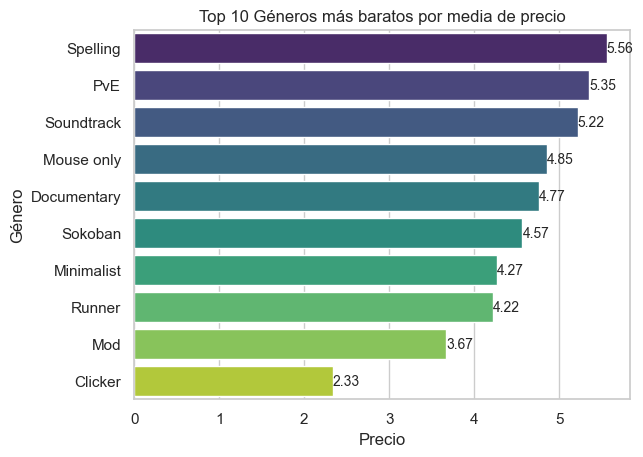

In [24]:
sns.barplot(data= df_generos_precio.tail(10), x= 'price', y= 'genres', palette='viridis')
for index, value in enumerate(df_generos_precio.tail(10)['price']):
    plt.text(value, index, str(round(value,2)), ha='left', va='center', fontsize=10)
plt.title('Top 10 Géneros más baratos por media de precio')
plt.xlabel('Precio')
plt.ylabel('Género')
plt.show()

In [65]:
df_generos.head()

,genres,app_name,title,id,tags,specs,price,early_access,developer,release_date,Año
0,Strategy,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,761140,Kotoshiro,2018-01-04,2018
1,Action,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,761140,Kotoshiro,2018-01-04,2018
2,Indie,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,761140,Kotoshiro,2018-01-04,2018
3,Casual,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,761140,Kotoshiro,2018-01-04,2018
4,Simulation,Lost Summoner Kitty,Lost Summoner Kitty,761140,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,761140,Kotoshiro,2018-01-04,2018


In [67]:
df_generos_año=df_generos.groupby(['genres', 'Año']).agg({'id': 'count'}).reset_index().rename(columns={'id': 'Cantidad'})
df_generos_año.tail(8)

,genres,Año,Cantidad
4733,e-sports,2004,2
4734,e-sports,2010,1
4735,e-sports,2012,1
4736,e-sports,2013,2
4737,e-sports,2014,1
4738,e-sports,2015,11
4739,e-sports,2016,13
4740,e-sports,2017,18


In [69]:
generos_mas_frec = df_generos_frec['genres'].head(10).tolist()
print(generos_mas_frec)

['Indie', 'Action', 'Adventure', 'Casual', 'Strategy', 'Simulation', 'RPG', 'Singleplayer', 'Multiplayer', 'Free to Play']


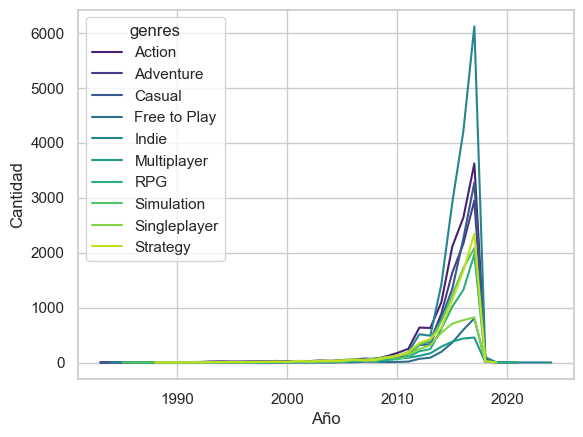

In [71]:
sns.lineplot(data=df_generos_año[df_generos_año['genres'].isin(generos_mas_frec)], x='Año', y='Cantidad', hue='genres', palette='viridis');

### Análisis de los nombres de los juegos.

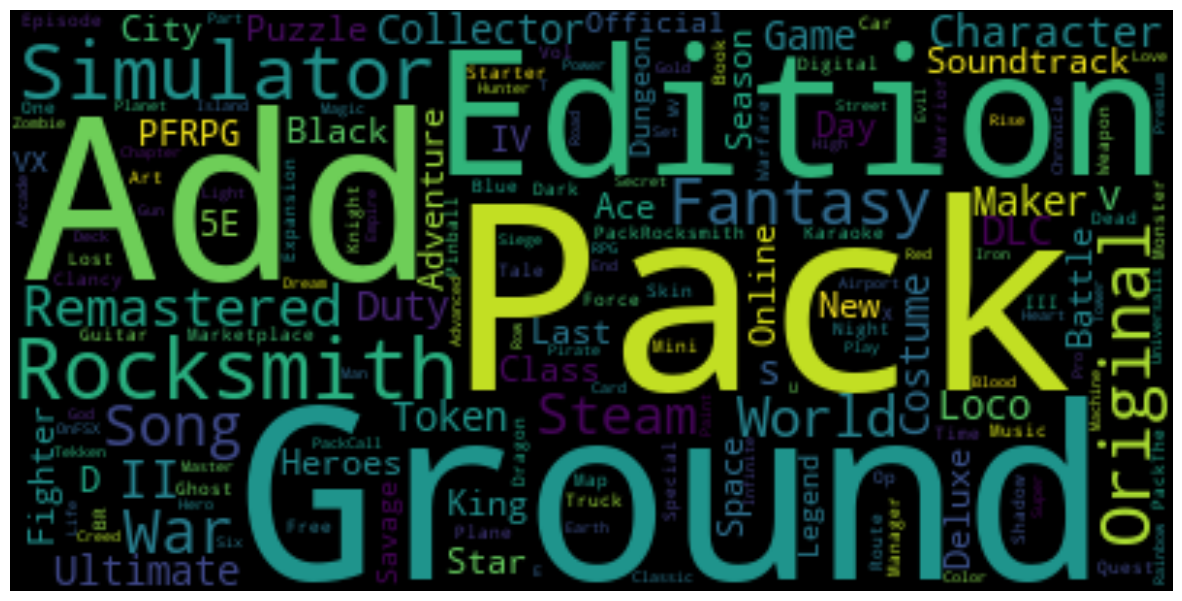

In [73]:
text= ''.join ([df_juegos.loc[i, 'app_name'] for i in range(len(df_juegos))])
wordcloud = WordCloud(collocations=False, background_color='black').generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Análisis de las reseñas de usuarios.

In [151]:
df_reseñas=pd.read_parquet('reseñas.parquet')
df_reseñas.head()

,user_id,review,item_id,0,1,Año,año_modaitem
0,76561197970982479,Simple yet with great replayability. In my opi...,1250,False,True,2011.0,2014.0
1,76561197970982479,It's unique and worth a playthrough.,22200,False,True,2011.0,2011.0
2,76561197970982479,Great atmosphere. The gunplay can be a bit chu...,43110,False,True,2011.0,2014.0
3,js41637,I know what you think when you see this title ...,251610,False,True,2014.0,2014.0
4,js41637,For a simple (it's actually not all that simpl...,227300,False,True,2013.0,2014.0


In [152]:
df_reseñas.drop(columns='0', axis=1, inplace=True)

In [153]:
df_reseñas=df_reseñas.rename(columns={'1':'recommend'})

In [154]:
df_reseñas.head()

,user_id,review,item_id,recommend,Año,año_modaitem
0,76561197970982479,Simple yet with great replayability. In my opi...,1250,True,2011.0,2014.0
1,76561197970982479,It's unique and worth a playthrough.,22200,True,2011.0,2011.0
2,76561197970982479,Great atmosphere. The gunplay can be a bit chu...,43110,True,2011.0,2014.0
3,js41637,I know what you think when you see this title ...,251610,True,2014.0,2014.0
4,js41637,For a simple (it's actually not all that simpl...,227300,True,2013.0,2014.0


Requiero los nombres e id de items en un solo dataframe.

In [155]:
df_nombres=df_juegos[['id', 'app_name']].drop_duplicates()
df_nombres.columns=['item_id', 'item_name']
df_nombres.head()

,item_id,item_name
0,761140.0,Lost Summoner Kitty
1,643980.0,Ironbound
2,670290.0,Real Pool 3D - Poolians
3,767400.0,弹炸人2222
4,772540.0,Battle Royale Trainer


In [156]:
df_items=pd.read_parquet('items_usuarios.parquet')
df_items.head()

,item_id,item_name,playtime_forever,playtime_2weeks,user_id,items_count,user_url
0,10,Counter-Strike,6,0,76561197970982479,277,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,0,76561197970982479,277,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,0,76561197970982479,277,http://steamcommunity.com/profiles/76561197970...
3,40,Deathmatch Classic,0,0,76561197970982479,277,http://steamcommunity.com/profiles/76561197970...
4,50,Half-Life: Opposing Force,0,0,76561197970982479,277,http://steamcommunity.com/profiles/76561197970...


In [157]:
df_nombres2 = df_items[['item_id', 'item_name']].drop_duplicates()
df_nombres2.head()

,item_id,item_name
0,10,Counter-Strike
1,20,Team Fortress Classic
2,30,Day of Defeat
3,40,Deathmatch Classic
4,50,Half-Life: Opposing Force


In [158]:
df_nombres=pd.concat([df_nombres,df_nombres2],axis=0)
df_nombres.head()

,item_id,item_name
0,761140.0,Lost Summoner Kitty
1,643980.0,Ironbound
2,670290.0,Real Pool 3D - Poolians
3,767400.0,弹炸人2222
4,772540.0,Battle Royale Trainer


In [159]:
df_nombres.drop_duplicates(subset='item_id', inplace=True)

In [160]:
len(df_nombres)

39877

In [161]:
df_nombres['item_id'] = pd.to_numeric(df_nombres['item_id'], errors='coerce')
df_nombres.to_parquet('sistema_recomendacion.parquet')

In [162]:
df_nombres.head()

,item_id,item_name
0,761140.0,Lost Summoner Kitty
1,643980.0,Ironbound
2,670290.0,Real Pool 3D - Poolians
3,767400.0,弹炸人2222
4,772540.0,Battle Royale Trainer


In [163]:
df_reseñas.head()

,user_id,review,item_id,recommend,Año,año_modaitem
0,76561197970982479,Simple yet with great replayability. In my opi...,1250,True,2011.0,2014.0
1,76561197970982479,It's unique and worth a playthrough.,22200,True,2011.0,2011.0
2,76561197970982479,Great atmosphere. The gunplay can be a bit chu...,43110,True,2011.0,2014.0
3,js41637,I know what you think when you see this title ...,251610,True,2014.0,2014.0
4,js41637,For a simple (it's actually not all that simpl...,227300,True,2013.0,2014.0


In [164]:
df_reseñas1=df_reseñas.groupby(['item_id', 'Año']).agg({'recommend': ['sum', 'count']}).reset_index()
df_reseñas1.columns=['item_id', 'Año', 'Recomendaciones', 'Reviews totales']
df_reseñas1['% de recomendación'] = round(df_reseñas1['Recomendaciones'] * 100 / df_reseñas1['Reviews totales'], 2)
df_reseñas1 = df_reseñas1.merge(df_nombres, how='left')
df_reseñas1.head()

,item_id,Año,Recomendaciones,Reviews totales,% de recomendación,item_name
0,10,2011.0,1,1,100.0,Counter-Strike
1,10,2011.0,1,1,100.0,Counter-Strike
2,10,2012.0,3,3,100.0,Counter-Strike
3,10,2012.0,3,3,100.0,Counter-Strike
4,10,2013.0,7,7,100.0,Counter-Strike


In [165]:
df_reseñas1.isna().sum()

item_id                 0
Año                     0
Recomendaciones         0
Reviews totales         0
% de recomendación      0
item_name             123
dtype: int64

In [166]:
df_reseñas1.head()

,item_id,Año,Recomendaciones,Reviews totales,% de recomendación,item_name
0,10,2011.0,1,1,100.0,Counter-Strike
1,10,2011.0,1,1,100.0,Counter-Strike
2,10,2012.0,3,3,100.0,Counter-Strike
3,10,2012.0,3,3,100.0,Counter-Strike
4,10,2013.0,7,7,100.0,Counter-Strike


In [171]:
df_reseñas.head()

,user_id,review,item_id,recommend,Año,año_modaitem
0,76561197970982479,Simple yet with great replayability. In my opi...,1250,True,2011.0,2014.0
1,76561197970982479,It's unique and worth a playthrough.,22200,True,2011.0,2011.0
2,76561197970982479,Great atmosphere. The gunplay can be a bit chu...,43110,True,2011.0,2014.0
3,js41637,I know what you think when you see this title ...,251610,True,2014.0,2014.0
4,js41637,For a simple (it's actually not all that simpl...,227300,True,2013.0,2014.0


In [168]:
df_reseñas1 = df_reseñas1.groupby(['item_id']).agg({'Recomendaciones': 'sum', 'Reviews totales': 'sum'}).reset_index()
df_reseñas1['% de recomendación'] = round(df_reseñas1['Recomendaciones'] * 100 / df_reseñas1['Reviews totales'], 2)
df_reseñas1.head()

,item_id,Recomendaciones,Reviews totales,% de recomendación
0,10,110,112,98.21
1,20,22,34,64.71
2,30,6,8,75.00
3,40,2,2,100.00
4,50,6,8,75.00


Se observan los items más recomendados

In [169]:
df_reseñas1=pd.concat([df_nombres['item_name'], df_reseñas1],axis=1)

In [173]:
# First, ensure both DataFrames have unique indices
df_reseñas.reset_index(drop=True, inplace=True)
df_reseñas1.reset_index(drop=True, inplace=True)

# Concatenate the DataFrames
df_combined = pd.concat([df_reseñas[['Año']], df_reseñas1], axis=1)

# Display the first few rows of the combined DataFrame
print(df_combined.head())


      Año                item_name  item_id  Recomendaciones  Reviews totales  \
0  2011.0      Lost Summoner Kitty     10.0            110.0            112.0   
1  2011.0                Ironbound     20.0             22.0             34.0   
2  2011.0  Real Pool 3D - Poolians     30.0              6.0              8.0   
3  2014.0                  弹炸人2222     40.0              2.0              2.0   
4  2013.0    Battle Royale Trainer     50.0              6.0              8.0   

   % de recomendación  
0               98.21  
1               64.71  
2               75.00  
3              100.00  
4               75.00  


In [174]:
df_combined.head()

,Año,item_name,item_id,Recomendaciones,Reviews totales,% de recomendación
0,2011.0,Lost Summoner Kitty,10.0,110.0,112.0,98.21
1,2011.0,Ironbound,20.0,22.0,34.0,64.71
2,2011.0,Real Pool 3D - Poolians,30.0,6.0,8.0,75.00
3,2014.0,弹炸人2222,40.0,2.0,2.0,100.00
4,2013.0,Battle Royale Trainer,50.0,6.0,8.0,75.00


In [179]:
df_combined.sort_values(by='Recomendaciones', ascending=False).head(10)

,Año,item_name,item_id,Recomendaciones,Reviews totales,% de recomendación
26,2012.0,Vaporwave Simulator,730.0,6858.0,7416.0,92.48
28925,2014.0,Company of Heroes: Opposing Fronts,730.0,6858.0,7416.0,92.48
20,2014.0,DinoBlaster,440.0,3571.0,3694.0,96.67
28919,2015.0,Half-Life 2: Deathmatch,440.0,3571.0,3694.0,96.67
28983,2015.0,Beat Hazard,4000.0,3314.0,3408.0,97.24
84,2015.0,BioShock™,4000.0,3314.0,3408.0,97.24
2219,2013.0,Agarest Zero - DLC Bundle #3,304930.0,1886.0,2062.0,91.46
22,2014.0,Half-Life,550.0,1444.0,1486.0,97.17
28921,2015.0,Half-Life Deathmatch: Source,550.0,1444.0,1486.0,97.17
23,2012.0,Fallen Mage,570.0,1441.0,1544.0,93.33


In [178]:
df_combined.isna().sum()

Año                   0
item_name             0
item_id               0
Recomendaciones       0
Reviews totales       0
% de recomendación    0
dtype: int64

In [177]:
df_combined.dropna(inplace=True)

Estos son los juegos más recomendados

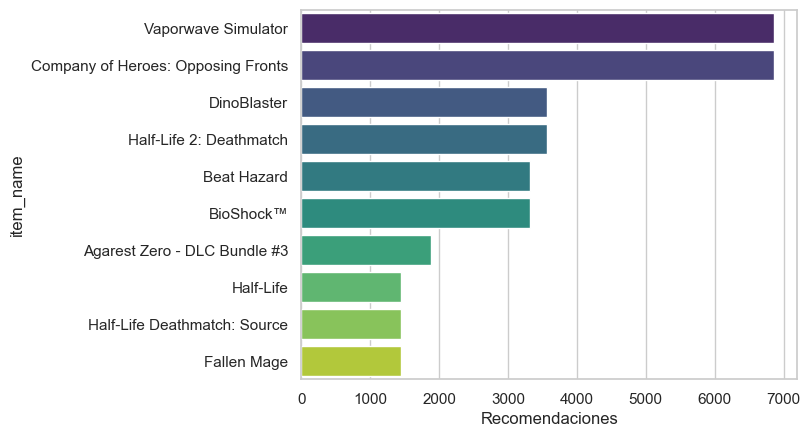

In [186]:
sns.barplot(data=df_combined.sort_values(by= 'Recomendaciones', ascending=False).head(10), x= 'Recomendaciones', y= 'item_name', palette='viridis');

Se observa como cambia el porcentaje de recomendación

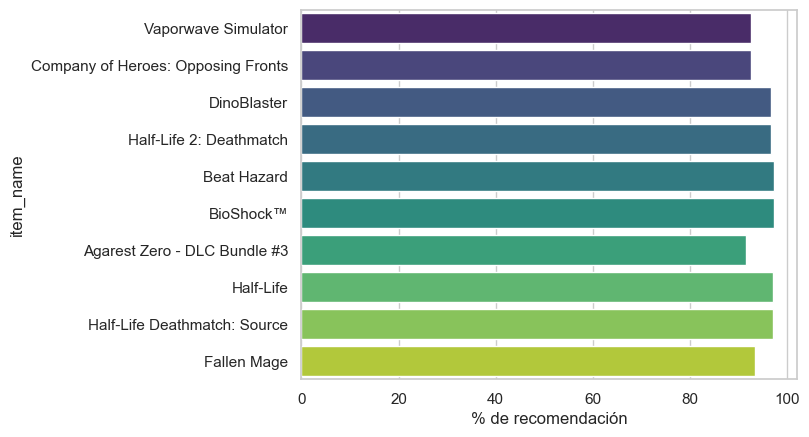

In [187]:
sns.barplot(data=df_combined.sort_values(by= 'Recomendaciones', ascending=False).head(10), x= '% de recomendación', y= 'item_name', palette='viridis');